# Lab 1. 3375, Корня Игорь

## Исследование и анализ датасета

Этот ноутбук содержит полный статистический анализ выбранного датасета,
включая изучение распределений, выбросов и корреляций между переменными.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv('WineQT.csv', sep=';')

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# Описание датасета: Wine Quality Dataset

## Введение

Мною был выбран датасет **Wine Quality Dataset** из репозитория [Kaggle](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset).

Датасет представляет собой набор характеристик качества вин, включающий физико-химические параметры вин и их субъективные оценки качества.

## Основная информация о датасете

**Предметная область:** Пищевая промышленность, энология, контроль качества пищевых продуктов

**Источник данных:** Kaggle

**Характер данных:** Реальные данные, собранные в результате лабораторного анализа португальских вин

**Размер датасета:** 1143 наблюдения (образцы вин), 13 атрибутов

## Описание атрибутов

Все атрибуты датасета являются числовыми, за исключением идентификатора. Ниже приведено подробное описание каждого атрибута:

| № | Атрибут | Тип данных | Единицы измерения | Описание |
|---|---------|-----------|------------------|---------|
| 1 | `fixed acidity` | Числовой | г/дм³ | Нелетучая кислотность (в основном винная кислота) - желаемая для вина кислотность |
| 2 | `volatile acidity` | Числовой | г/дм³ | Летучая кислотность (уксусная кислота) - высокие уровни могут ухудшить вкус вина, придавая ему винный привкус |
| 3 | `citric acid` | Числовой | г/дм³ | Лимонная кислота - добавляет свежесть и кислинку, обычно присутствует в низких концентрациях |
| 4 | `residual sugar` | Числовой | г/дм³ | Остаточный сахар - сахар, оставшийся после брожения (влияет на сладость вина) |
| 5 | `chlorides` | Числовой | г/дм³ | Хлориды (соль) - влияет на вкусовые характеристики |
| 6 | `free sulfur dioxide` | Числовой | мг/дм³ | Свободный диоксид серы - предотвращает микробиальное загрязнение и окисление |
| 7 | `total sulfur dioxide` | Числовой | мг/дм³ | Общий диоксид серы (свободный + связанный) - консервант, используемый в виноделии |
| 8 | `density` | Числовой | г/см³ | Плотность вина - близка к плотности воды, зависит от содержания спирта и сахара |
| 9 | `pH` | Числовой | - | pH (водородный показатель) - описывает кислотность вина в логарифмической шкале (3,0 - 4,0) |
| 10 | `sulphates` | Числовой | г/дм³ | Сульфаты - модуляторы диоксида серы, действуют как антиоксидант |
| 11 | `alcohol` | Числовой | % об. | Содержание алкоголя (объемный процент) - один из основных компонентов вина |
| 12 | `quality` | Числовой (целое число) | Баллы (0-10) | **Целевая переменная** - субъективная оценка качества вина (от 0 до 10 баллов) |
| 13 | `Id` | Целое число | - | Идентификатор образца вина - уникальный номер каждого наблюдения |

## Задача анализа

**Основная цель:** Выявить закономерности между физико-химическими свойствами вина и его субъективной оценкой качества.


## Этап 1: Анализ пропущенных значений и дескриптивная статистика


In [ ]:
missing_data = df.isnull().sum()
print("\nПропущенные значения в каждой колонке:")
print(missing_data)

print(f"\nПроцент пропущенных значений:")
missing_percent = (missing_data / len(df) * 100).round(2)
print(missing_percent)

if missing_data.sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Матрица пропущенных значений')
    plt.tight_layout()
    plt.show()
else:
    print("\n Пропущенных значений не обнаружено!")

numeric_columns = df.select_dtypes(include=[np.number]).columns.drop('Id').tolist()

print(f"\nЧисловые колонки для анализа: {len(numeric_columns)}")
print(numeric_columns)

statistics = pd.DataFrame({
    'Среднее': df[numeric_columns].mean(),
    'СКО': df[numeric_columns].std(),
    'Минимум': df[numeric_columns].min(),
    '25%': df[numeric_columns].quantile(0.25),
    'Медиана': df[numeric_columns].median(),
    '75%': df[numeric_columns].quantile(0.75),
    'Максимум': df[numeric_columns].max()
}).round(4)

print("\nТабличная статистика для всех числовых переменных:")
print(statistics)

means = df[numeric_columns].mean()
stds = df[numeric_columns].std()



Пропущенные значения в каждой колонке:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Процент пропущенных значений:
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

 Пропущенных значений не обнаружено!

Числовые колонки для анализа: 12
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxid

## Этап 2: Гистограммы распределения значений


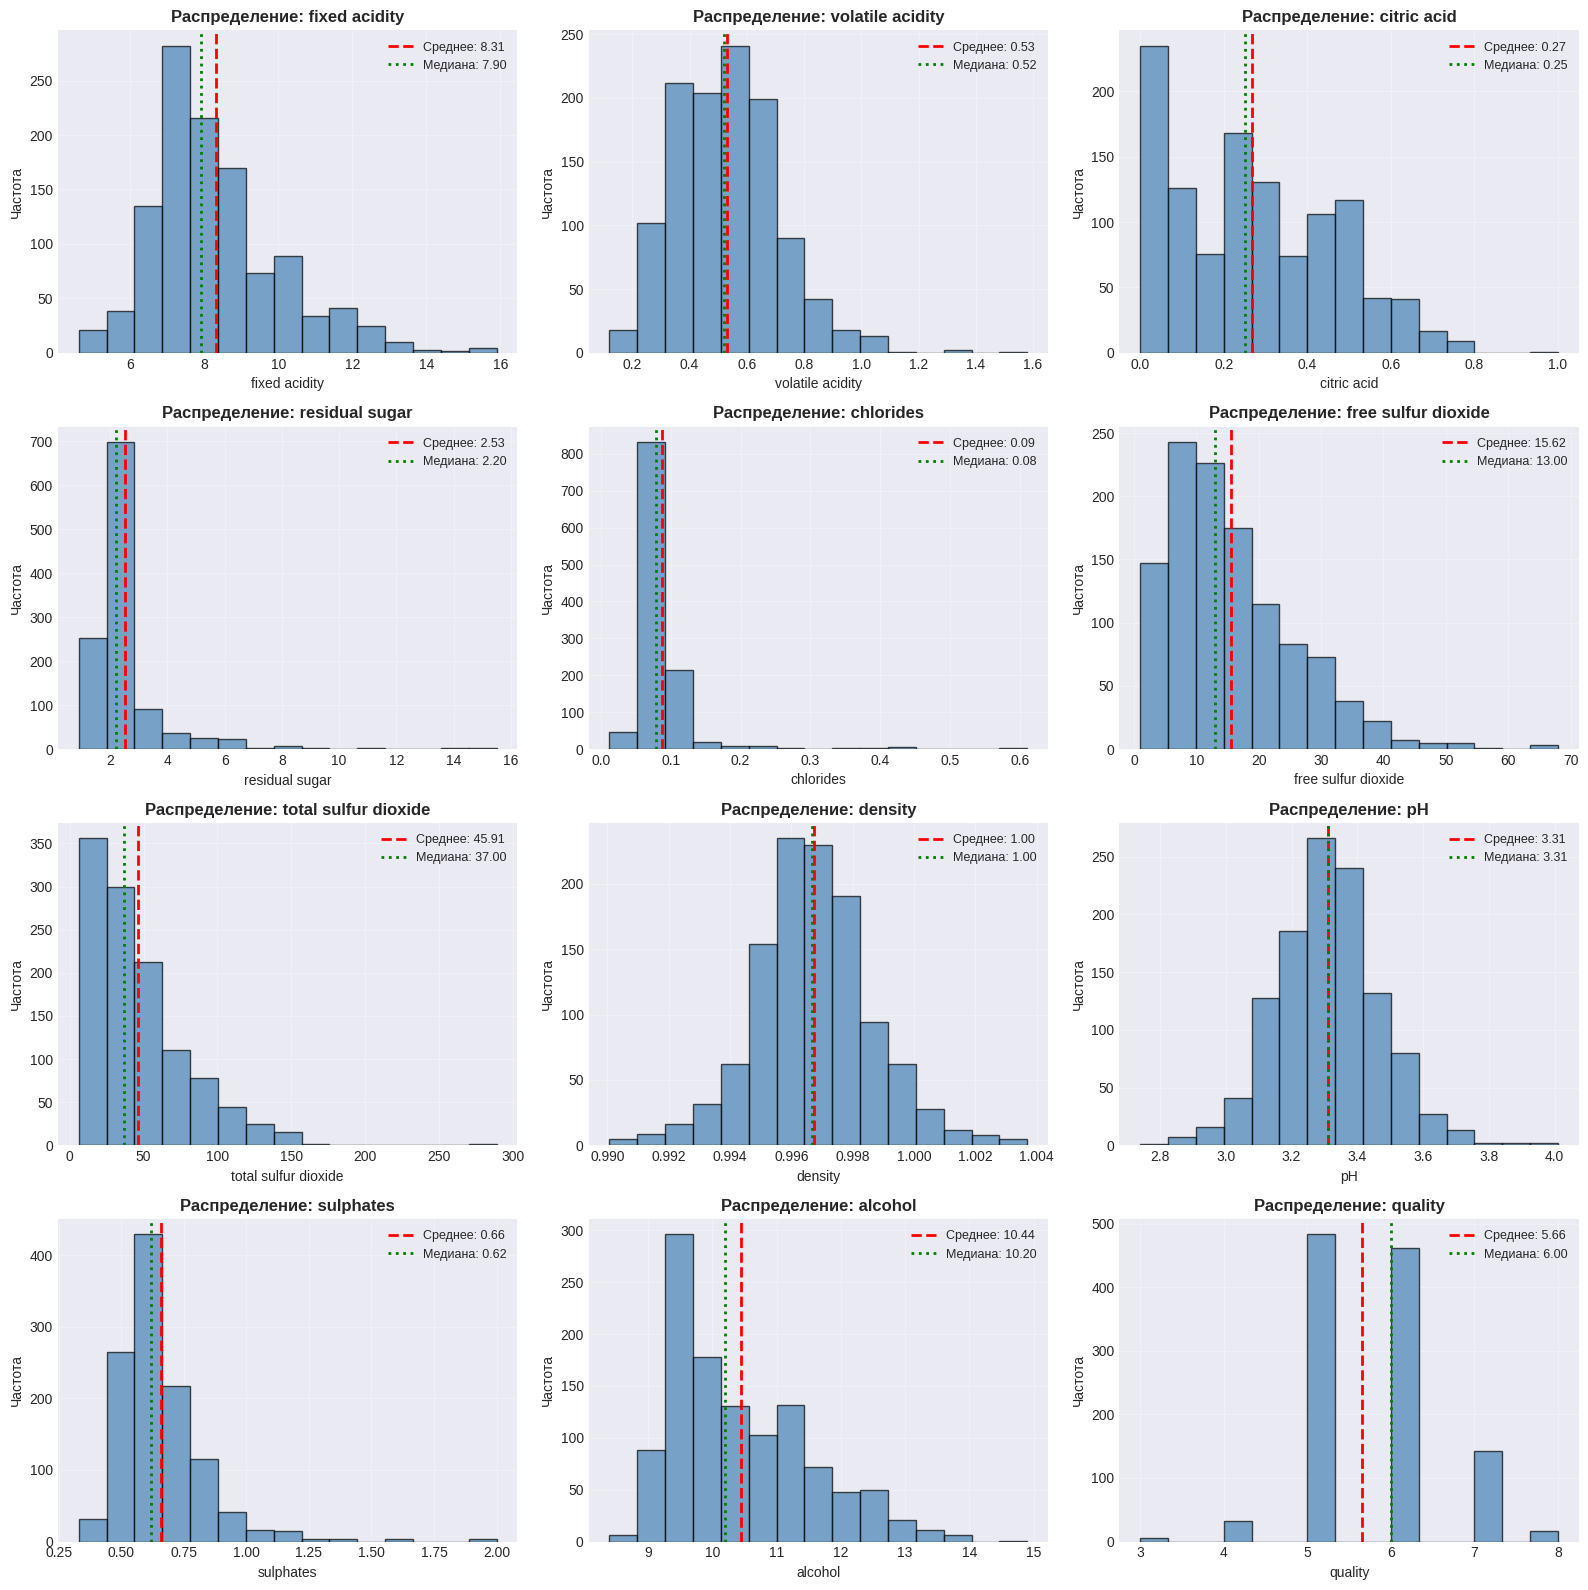

Гистограммы построены успешно!


In [ ]:

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    data = df[col]

    n_bins = int(np.ceil(np.log2(len(data)) + 1))
    n_bins = max(15, min(n_bins, 50))
    axes[idx].hist(data, bins=n_bins, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Распределение: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')
    axes[idx].grid(True, alpha=0.3)
    mean_val = data.mean()
    median_val = data.median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Медиана: {median_val:.2f}')
    axes[idx].legend(fontsize=9)
for idx in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("Гистограммы построены успешно!")


## Этап 3: Обнаружение выбросов методом IQR (Interquartile Range)


In [ ]:
def detect_outliers_iqr(data):
    """Функция для обнаружения выбросов методом IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (data < lower_bound) | (data > upper_bound), lower_bound, upper_bound

outliers_dict = {}
outlier_bounds = {}

print("\nСводка по выбросам:")

for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(df[col])
    outliers_dict[col] = outliers
    outlier_bounds[col] = (lower, upper)
    outlier_count = outliers.sum()

    print(f"\n{col}:")
    print(f"  Границы: [{lower:.4f}, {upper:.4f}]")
    print(f"  Количество выбросов: {outlier_count} ({(outlier_count/len(df)*100):.2f}%)")

    if outlier_count > 0:
        outlier_values = df[col][outliers].values
        print(f"  Значения выбросов: {sorted(outlier_values)}")



Сводка по выбросам:

fixed acidity:
  Границы: [4.1000, 12.1000]
  Количество выбросов: 44 (3.85%)
  Значения выбросов: [np.float64(12.2), np.float64(12.3), np.float64(12.3), np.float64(12.3), np.float64(12.3), np.float64(12.4), np.float64(12.4), np.float64(12.5), np.float64(12.5), np.float64(12.5), np.float64(12.5), np.float64(12.5), np.float64(12.5), np.float64(12.5), np.float64(12.6), np.float64(12.6), np.float64(12.6), np.float64(12.6), np.float64(12.7), np.float64(12.7), np.float64(12.8), np.float64(12.8), np.float64(12.8), np.float64(12.8), np.float64(12.8), np.float64(12.9), np.float64(12.9), np.float64(13.0), np.float64(13.0), np.float64(13.0), np.float64(13.2), np.float64(13.3), np.float64(13.3), np.float64(13.4), np.float64(13.5), np.float64(13.7), np.float64(13.8), np.float64(14.3), np.float64(15.0), np.float64(15.0), np.float64(15.5), np.float64(15.6), np.float64(15.6), np.float64(15.9)]

volatile acidity:
  Границы: [0.0213, 1.0112]
  Количество выбросов: 14 (1.22%)
  Зна

### Визуализация выбросов


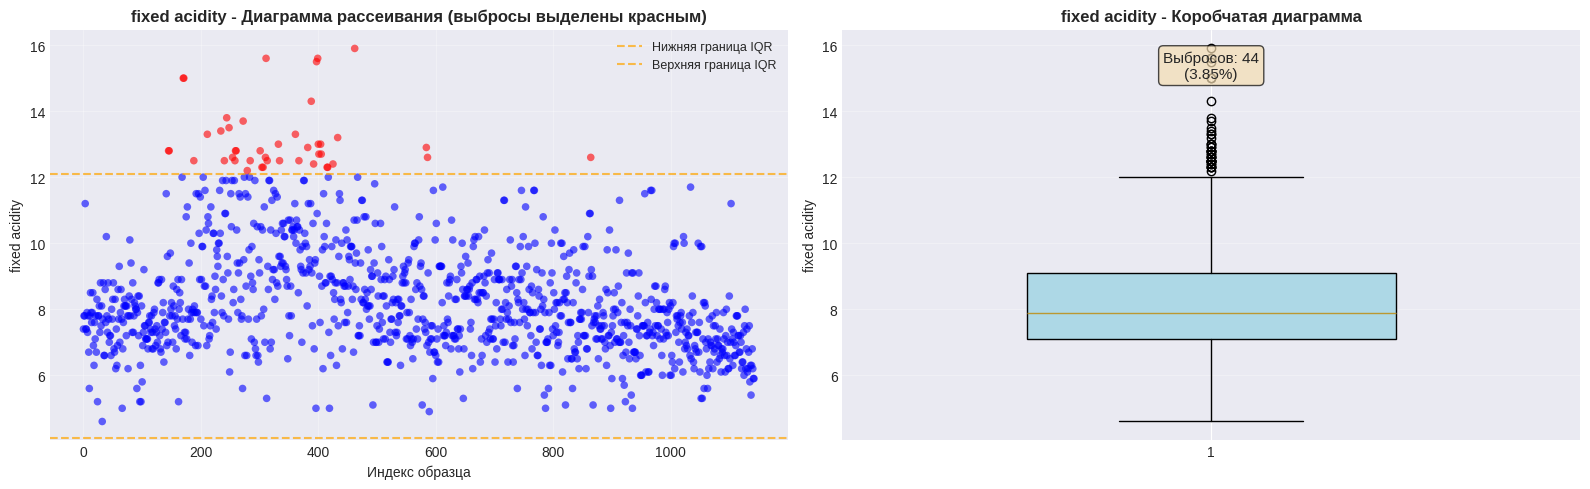

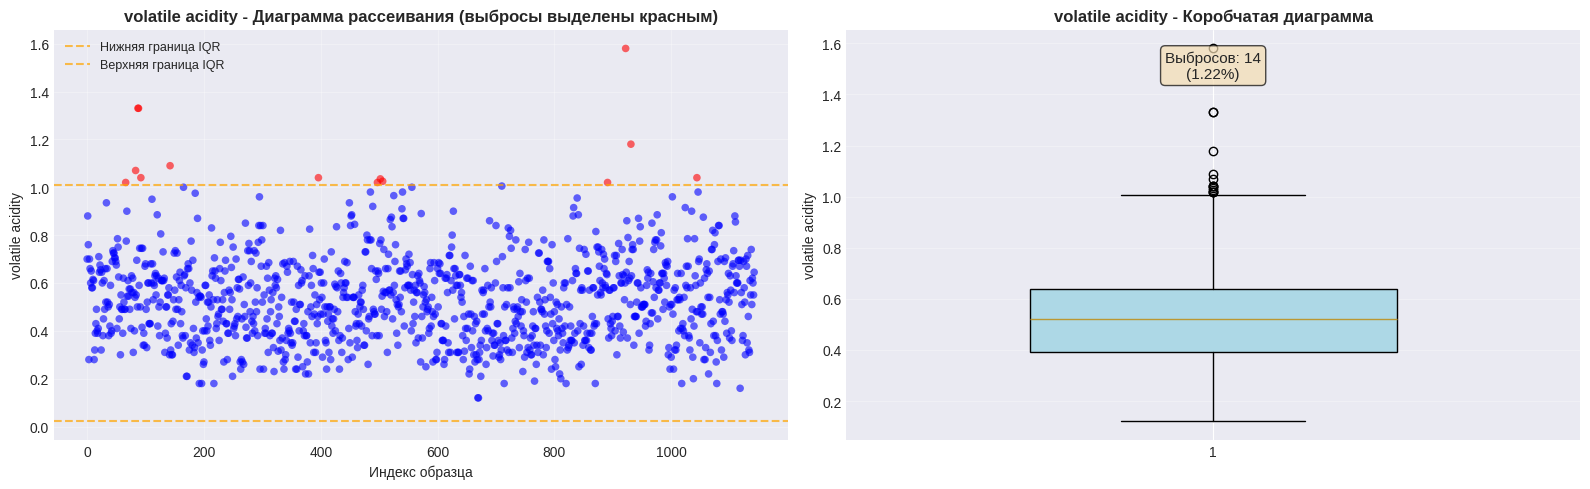

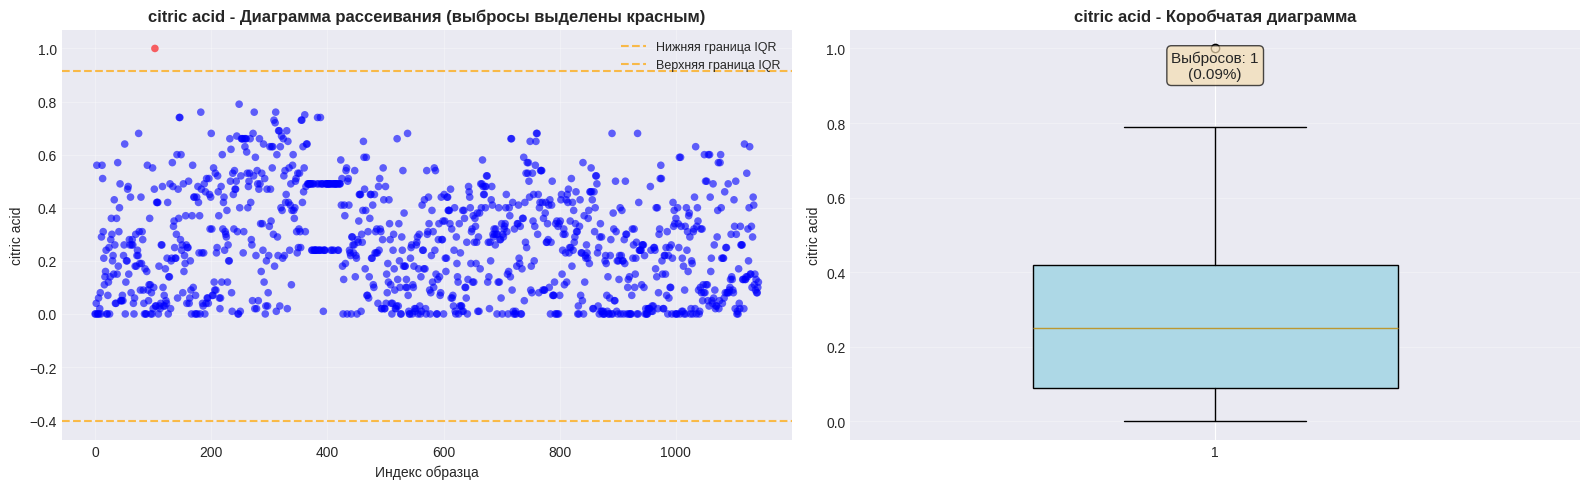

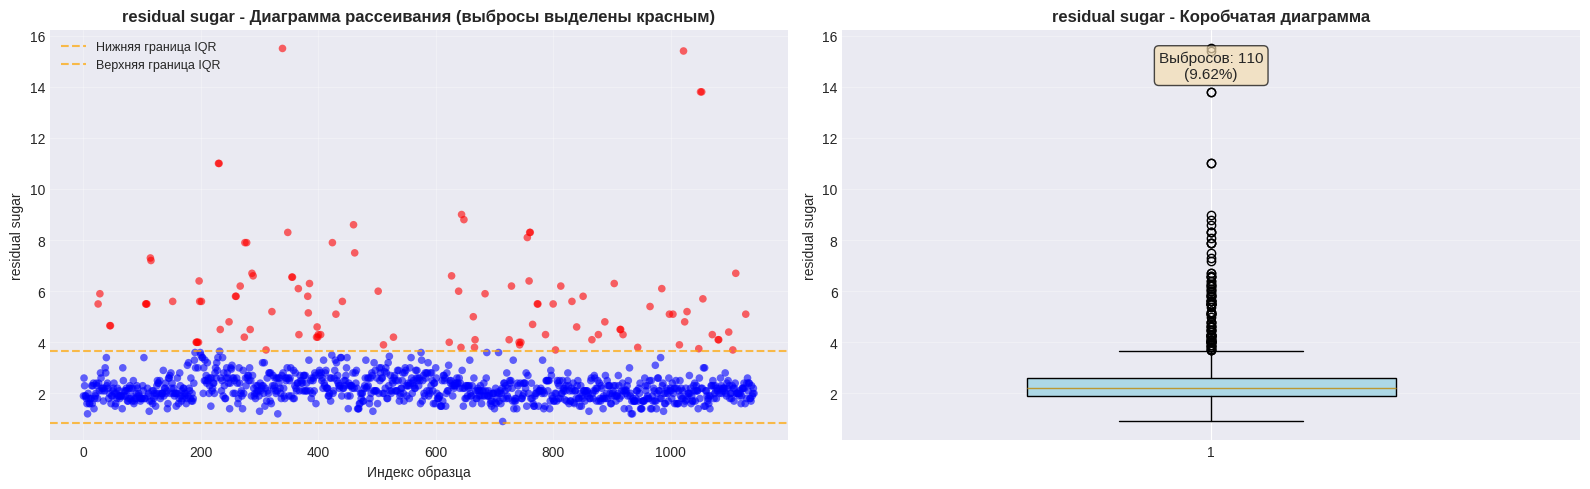

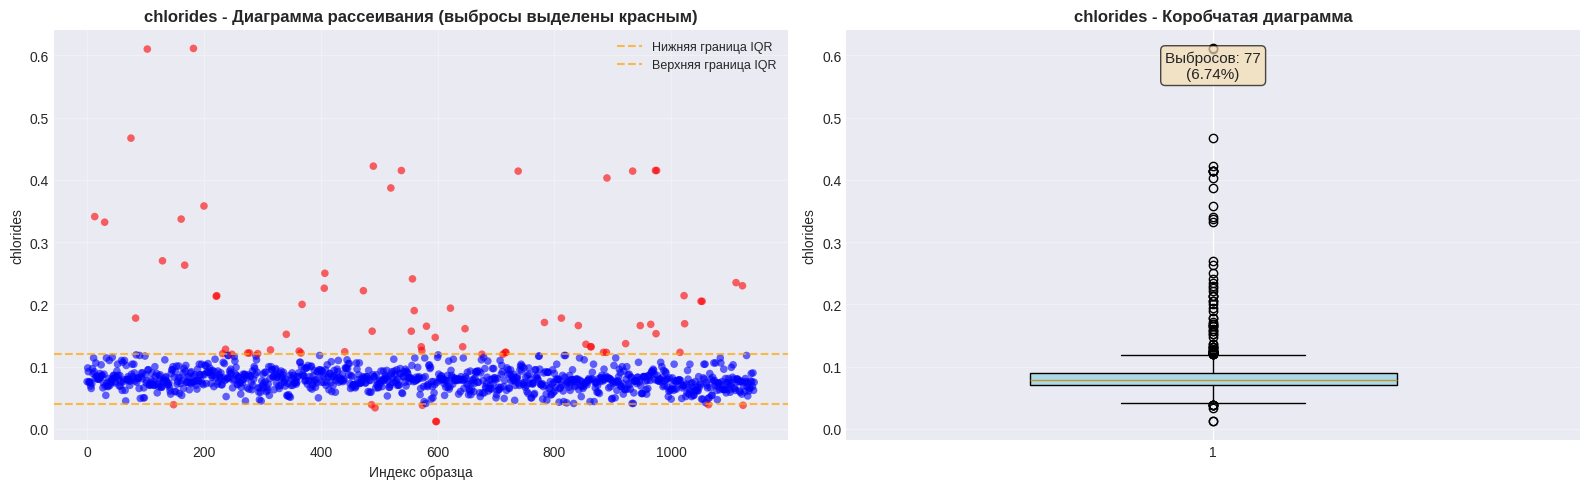

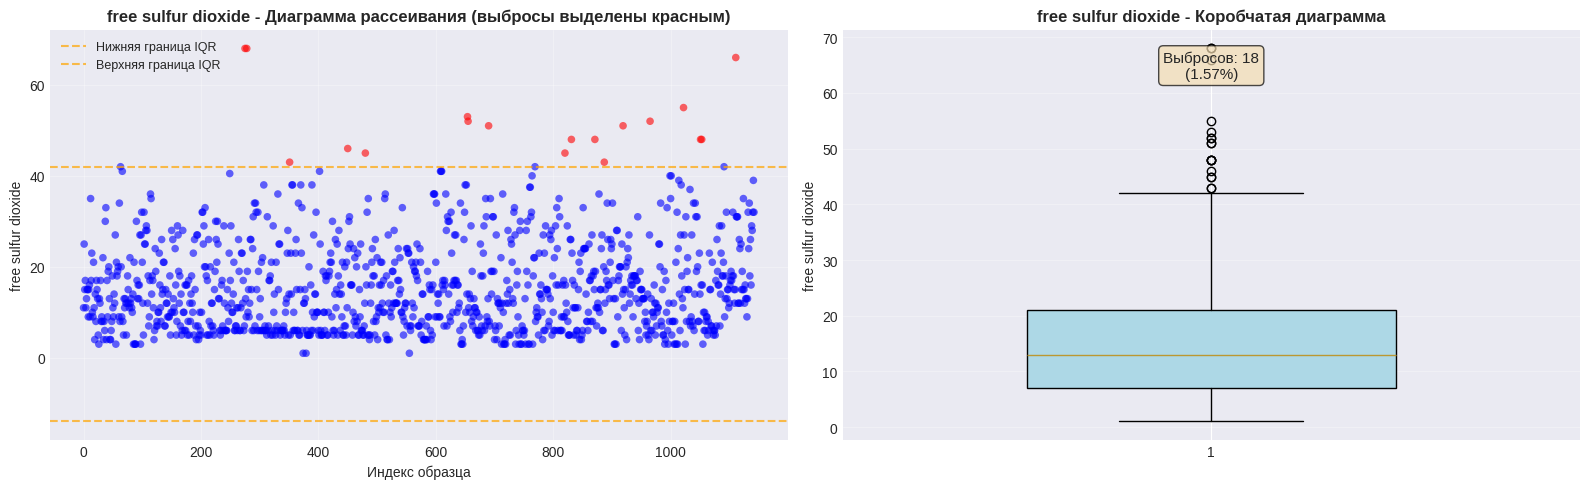

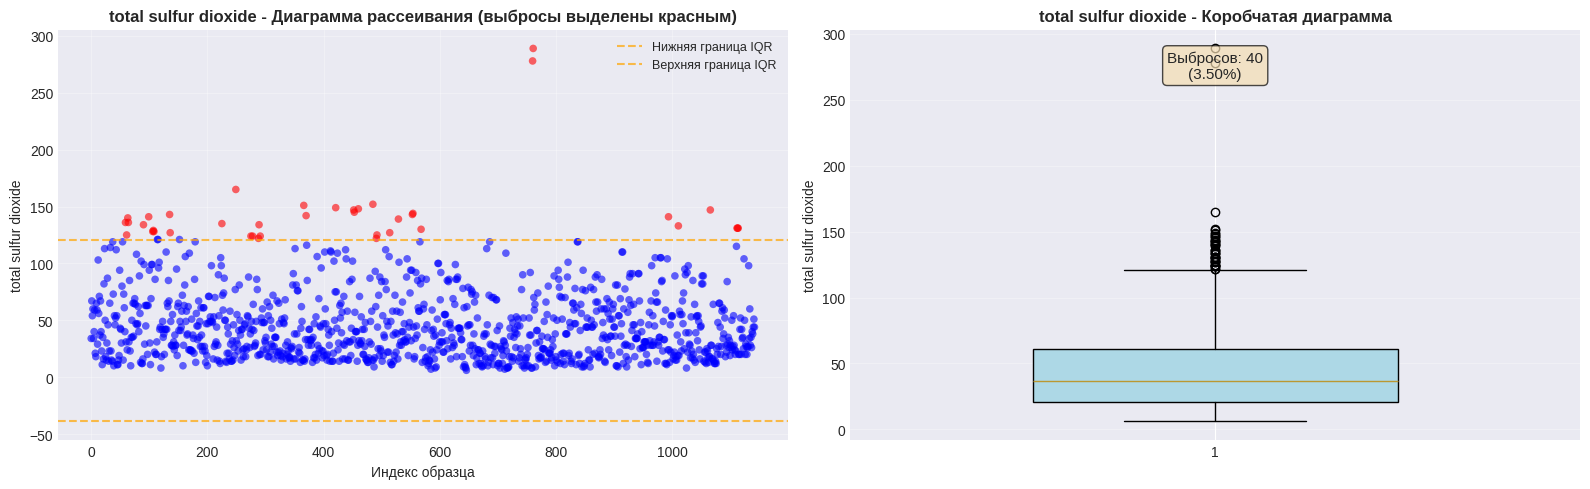

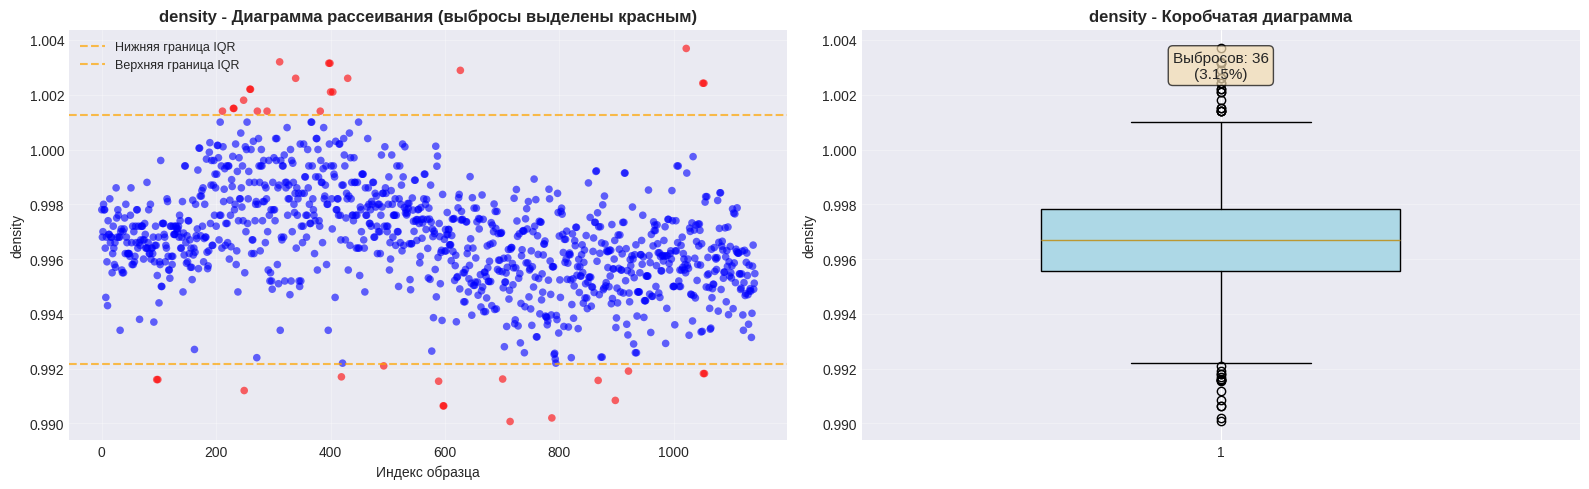

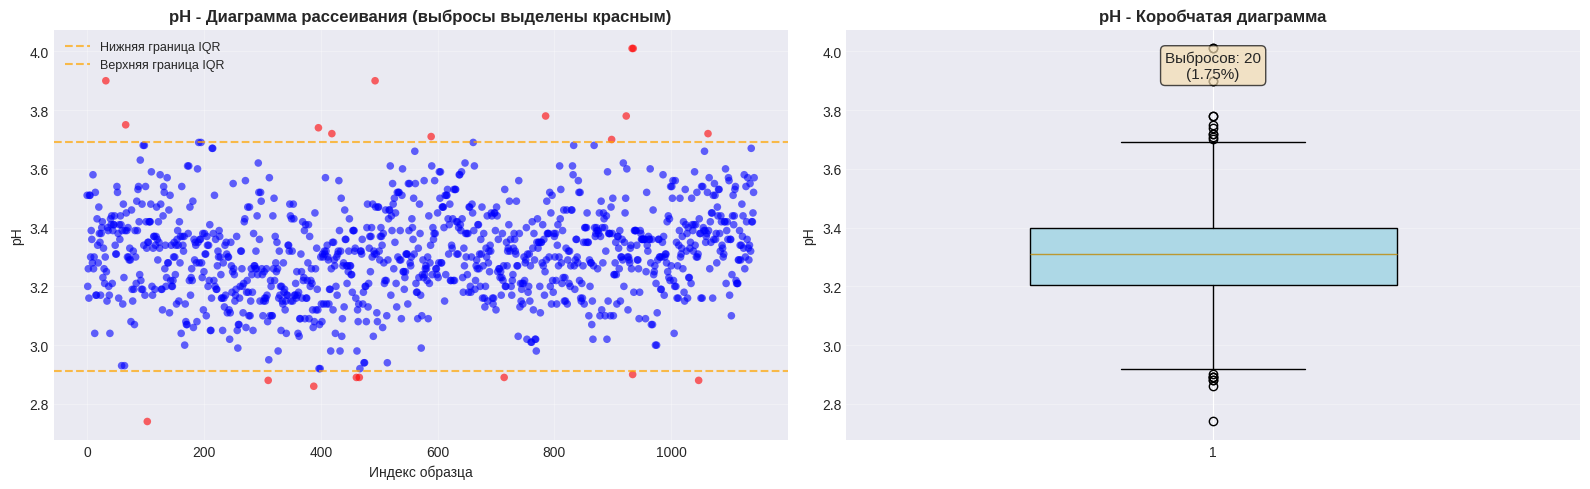

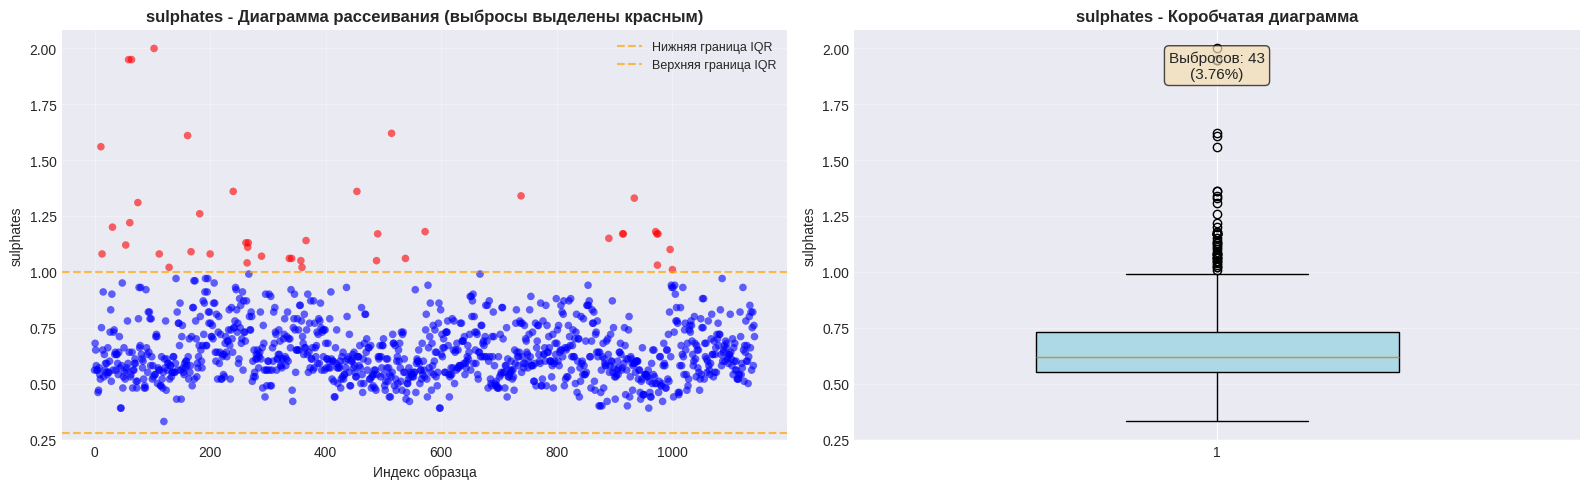

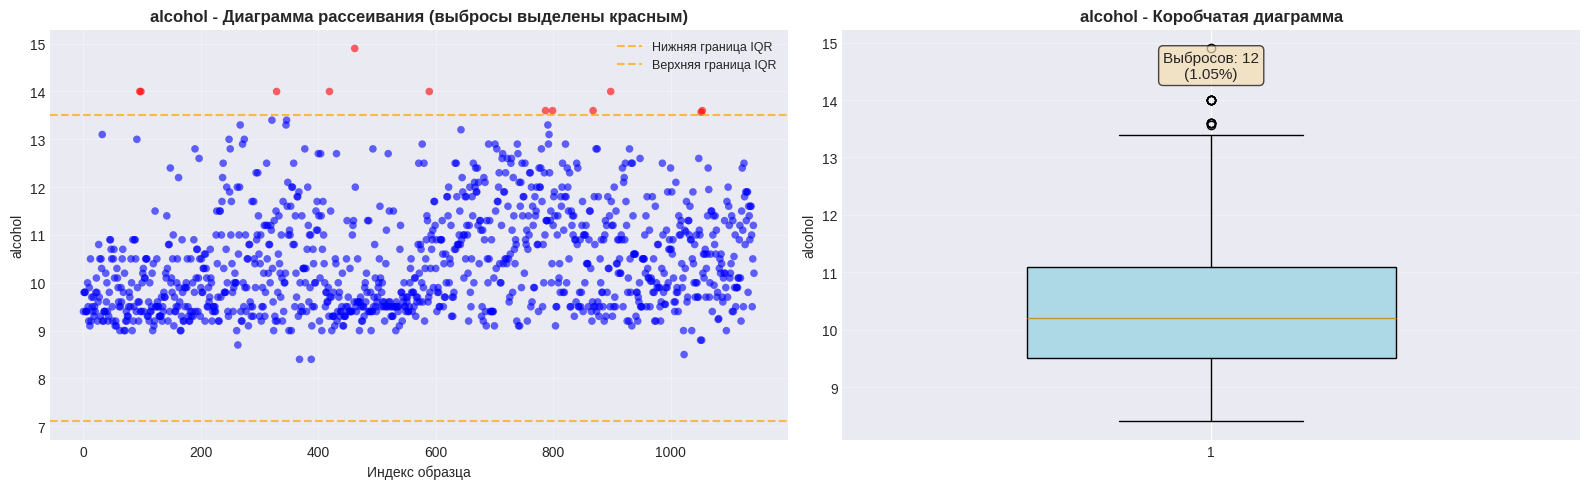

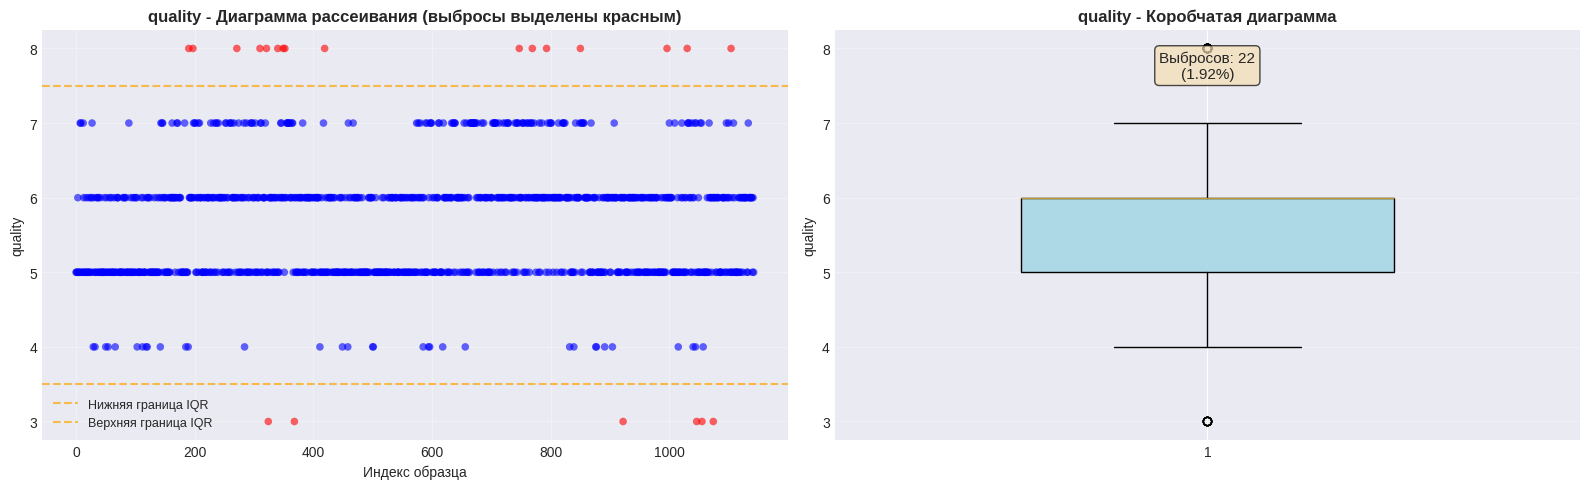

Визуализация выбросов завершена!


In [ ]:
for col in numeric_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

    data = df[col]
    outliers = outliers_dict[col]

    colors = ['red' if outliers.iloc[i] else 'blue' for i in range(len(df))]
    ax1.scatter(range(len(df)), data, c=colors, alpha=0.6, s=30, edgecolors='none')
    ax1.set_title(f'{col} - Диаграмма рассеивания (выбросы выделены красным)',
                  fontsize=12, fontweight='bold')
    ax1.set_xlabel('Индекс образца')
    ax1.set_ylabel(col)
    ax1.grid(True, alpha=0.3)

    lower_bound, upper_bound = outlier_bounds[col]
    ax1.axhline(y=lower_bound, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Нижняя граница IQR')
    ax1.axhline(y=upper_bound, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Верхняя граница IQR')
    ax1.legend(fontsize=9)

    bp = ax2.boxplot([data], vert=True, patch_artist=True, widths=0.5)
    bp['boxes'][0].set_facecolor('lightblue')
    ax2.set_ylabel(col)
    ax2.set_title(f'{col} - Коробчатая диаграмма', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')

    num_outliers = outliers.sum()
    ax2.text(0.5, 0.95, f'Выбросов: {num_outliers}\n({(num_outliers/len(df)*100):.2f}%)',
             transform=ax2.transAxes, fontsize=11, verticalalignment='top',
             horizontalalignment='center',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

    plt.tight_layout()
    plt.show()

print("Визуализация выбросов завершена!")


## Этап 4: Корреляционный анализ



Матрица корреляции:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000            -0.251        0.673   
volatile acidity             -0.251             1.000       -0.544   
citric acid                   0.673            -0.544        1.000   
residual sugar                0.172            -0.006        0.176   
chlorides                     0.108             0.056        0.245   
free sulfur dioxide          -0.165            -0.002       -0.058   
total sulfur dioxide         -0.111             0.078        0.037   
density                       0.682             0.017        0.375   
pH                           -0.685             0.221       -0.546   
sulphates                     0.175            -0.276        0.331   
alcohol                      -0.075            -0.204        0.106   
quality                       0.122            -0.407        0.241   

                      residual sugar  chlorides  free sulfur dioxide

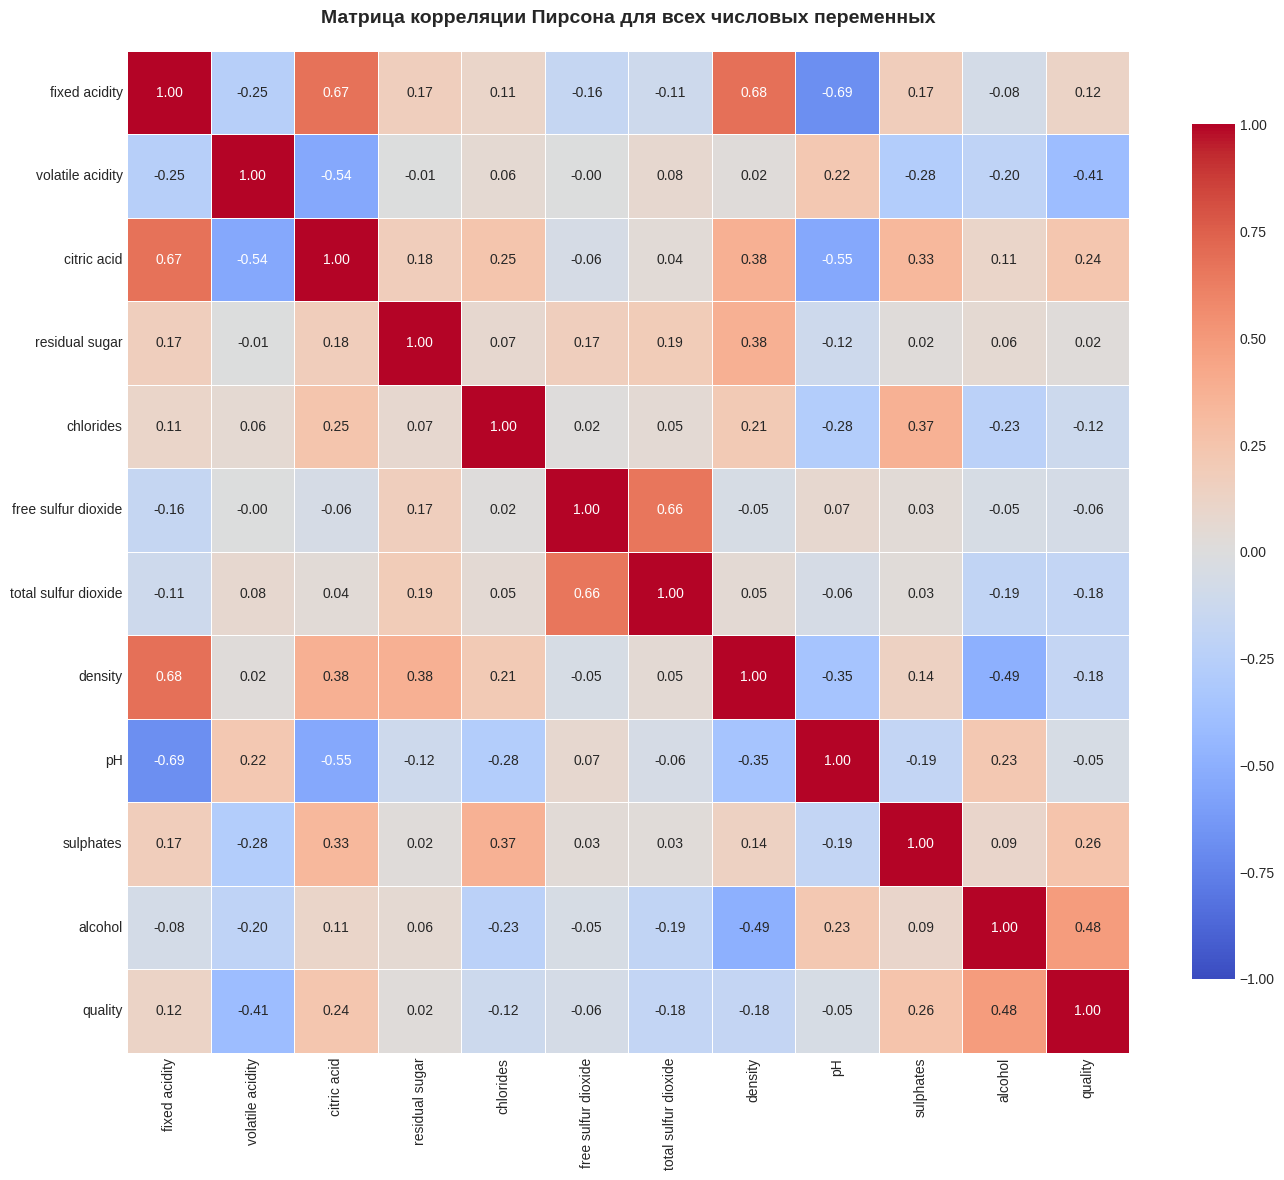

ВЫСОКАЯ КОРРЕЛЯЦИЯ (|r| > 0.7):

Высокой корреляции между переменными не обнаружено (|r| > 0.7)
КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 'QUALITY' (|r| > 0.3):

Корреляции отсортированы по абсолютному значению:
alcohol                 0.484866
volatile acidity       -0.407394
sulphates               0.257710
citric acid             0.240821
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
fixed acidity           0.121970
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
Name: quality, dtype: float64


Переменные со значимой корреляцией с качеством (|r| > 0.3):
  • alcohol: 0.4849 (средняя положительная)
  • volatile acidity: -0.4074 (средняя отрицательная)

Корреляционный анализ завершен!


In [ ]:
correlation_matrix = df[numeric_columns].corr()

print("\nМатрица корреляции:")
print(correlation_matrix.round(3))

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Матрица корреляции Пирсона для всех числовых переменных',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("ВЫСОКАЯ КОРРЕЛЯЦИЯ (|r| > 0.7):")

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_corr_pairs.append((var1, var2, corr_value))
            print(f"\n{var1} <--> {var2}")
            print(f"  Коэффициент корреляции: {corr_value:.4f}")
            print(f"  Тип: {'Сильная положительная' if corr_value > 0 else 'Сильная отрицательная'}")

if not high_corr_pairs:
    print("\nВысокой корреляции между переменными не обнаружено (|r| > 0.7)")

print("КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 'QUALITY' (|r| > 0.3):")

quality_corr = correlation_matrix['quality'].drop('quality').sort_values(key=abs, ascending=False)
print("\nКорреляции отсортированы по абсолютному значению:")
print(quality_corr)

print("\n\nПеременные со значимой корреляцией с качеством (|r| > 0.3):")
for var, corr in quality_corr.items():
    if abs(corr) > 0.3:
        direction = "положительная" if corr > 0 else "отрицательная"
        strength = "сильная" if abs(corr) > 0.5 else "средняя"
        print(f"  • {var}: {corr:.4f} ({strength} {direction})")

print("\nКорреляционный анализ завершен!")


## Этап 5: Анализ взаимосвязей между переменными


Построение матрицы диаграмм рассеивания


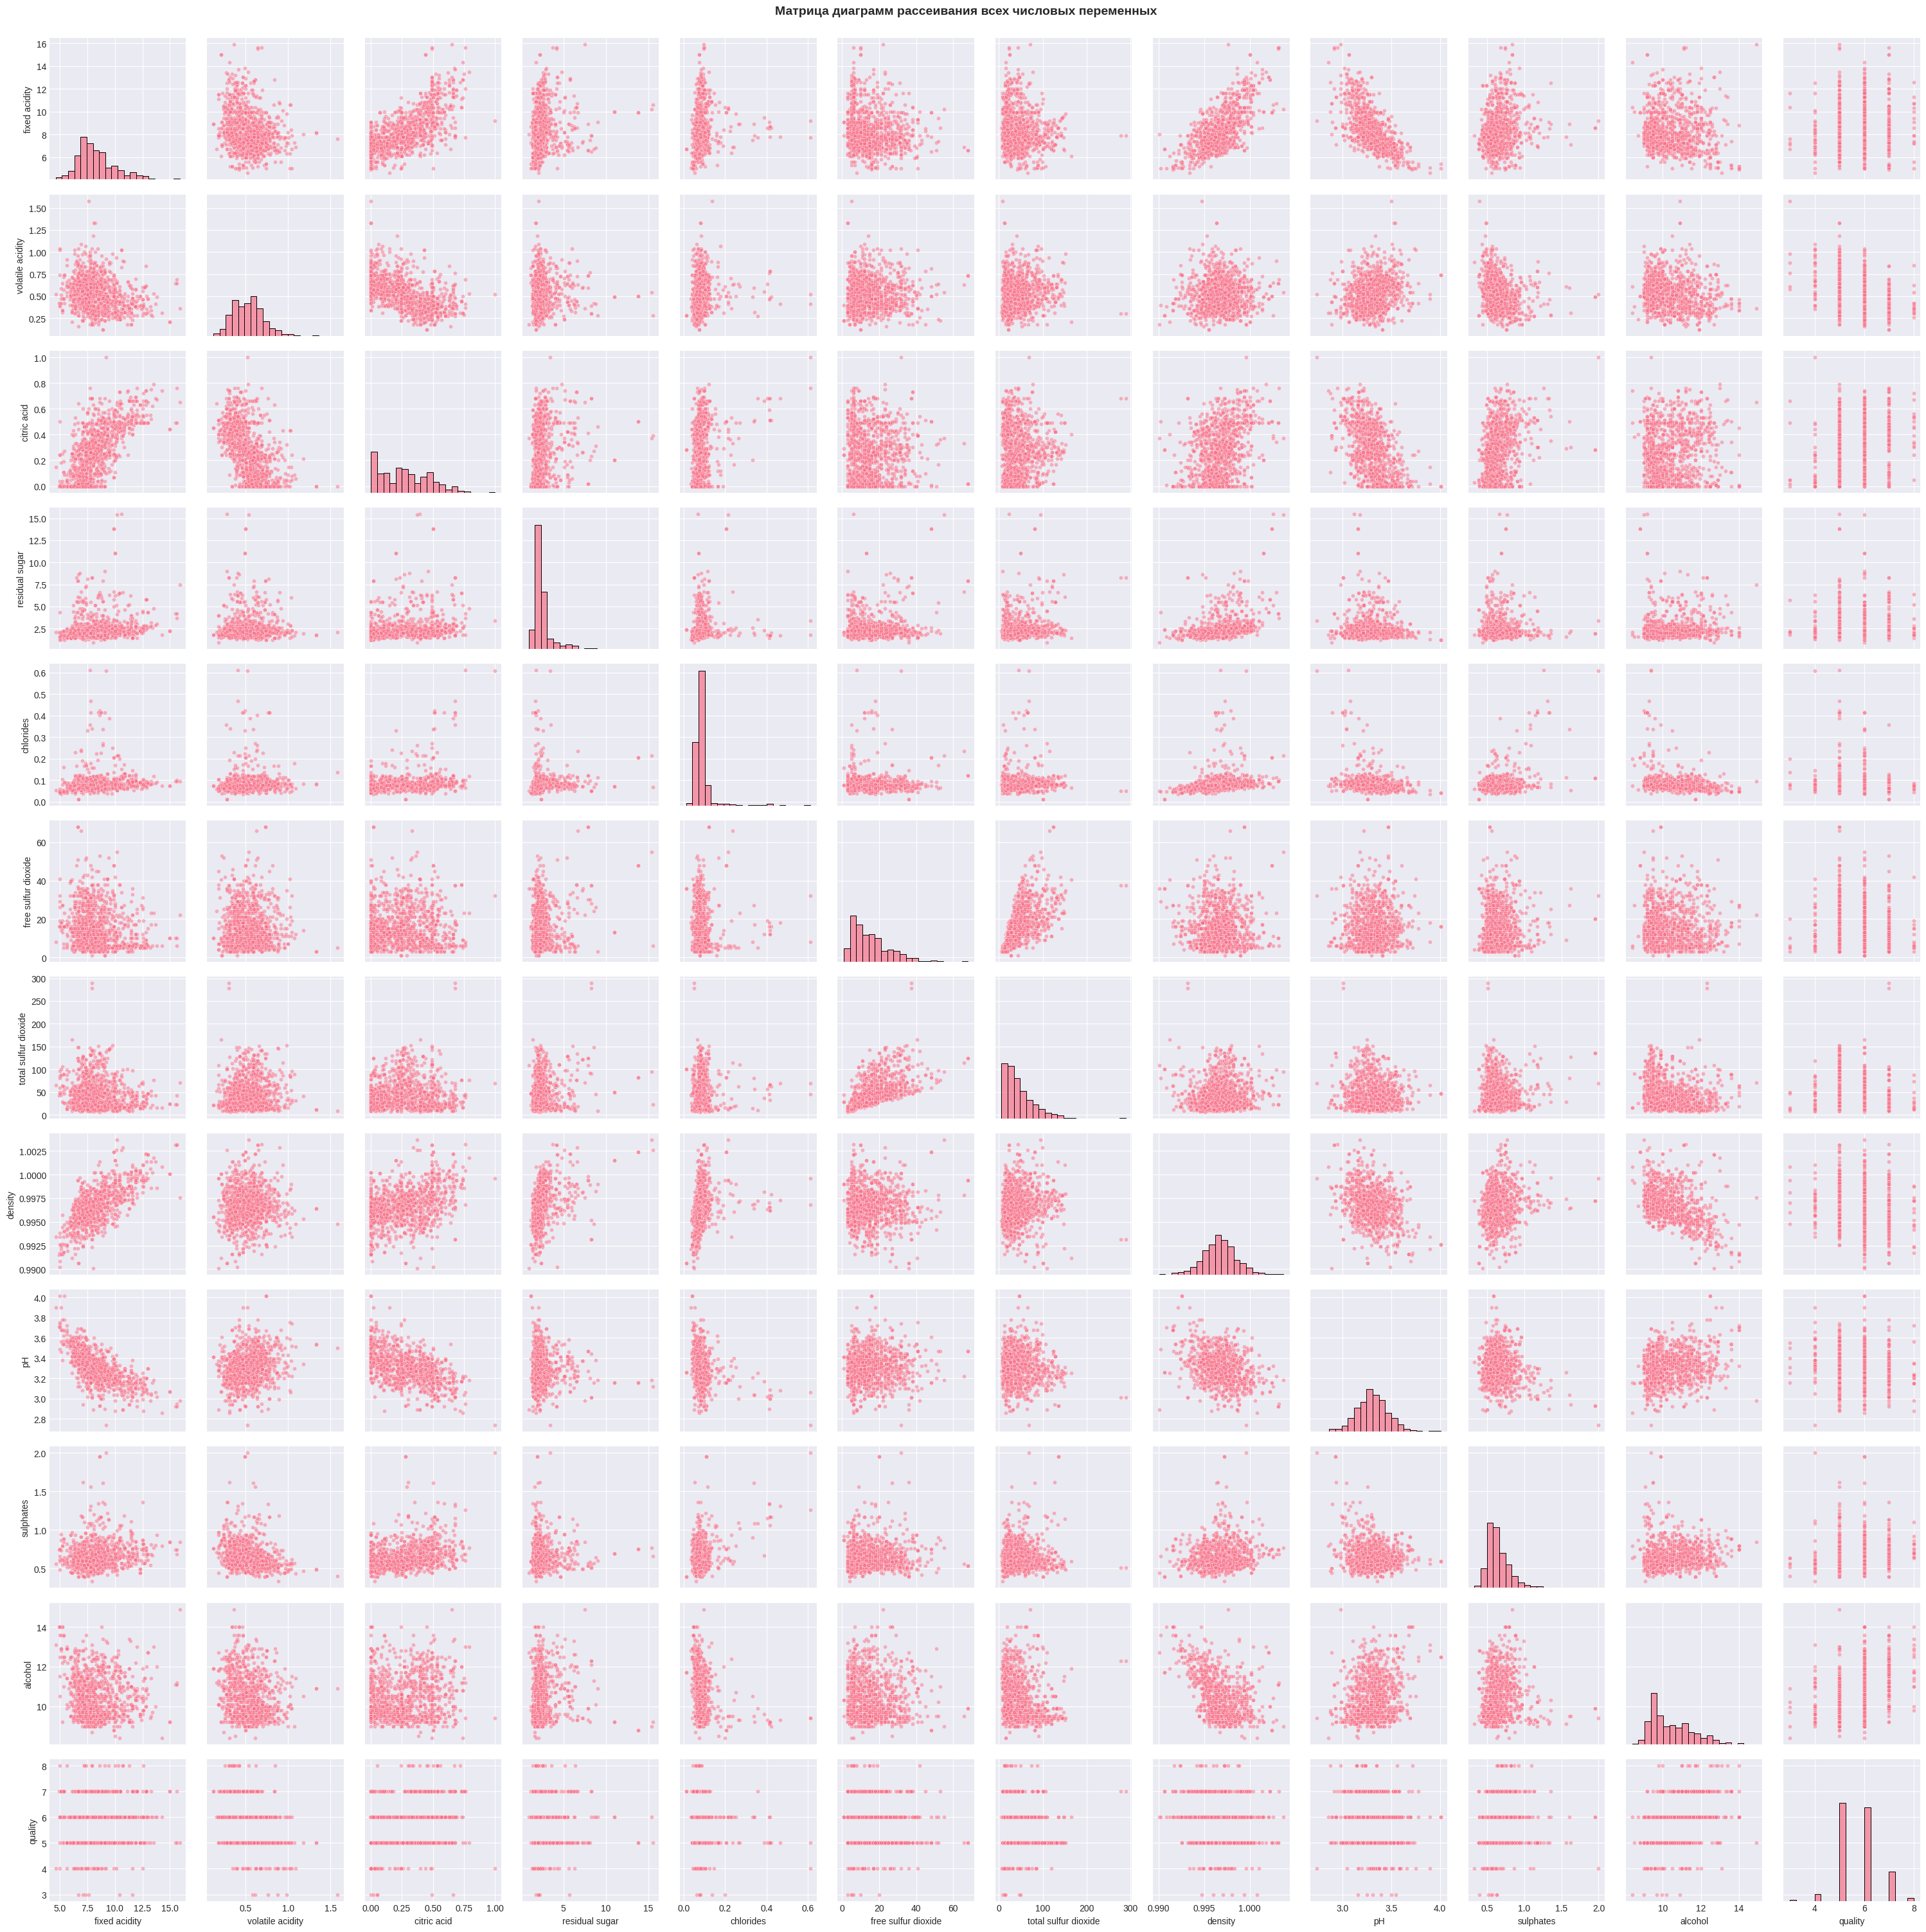

Pair plot построен успешно!


In [ ]:
print("Построение матрицы диаграмм рассеивания")

sns.pairplot(df[numeric_columns],
             diag_kind='hist',
             plot_kws={'alpha': 0.5, 's': 20},
             diag_kws={'alpha': 0.7, 'bins': 20, 'edgecolor': 'black'})

plt.suptitle('Матрица диаграмм рассеивания всех числовых переменных',
             fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

print("Pair plot построен успешно!")


## Этап 6: Детальный анализ ключевых взаимосвязей


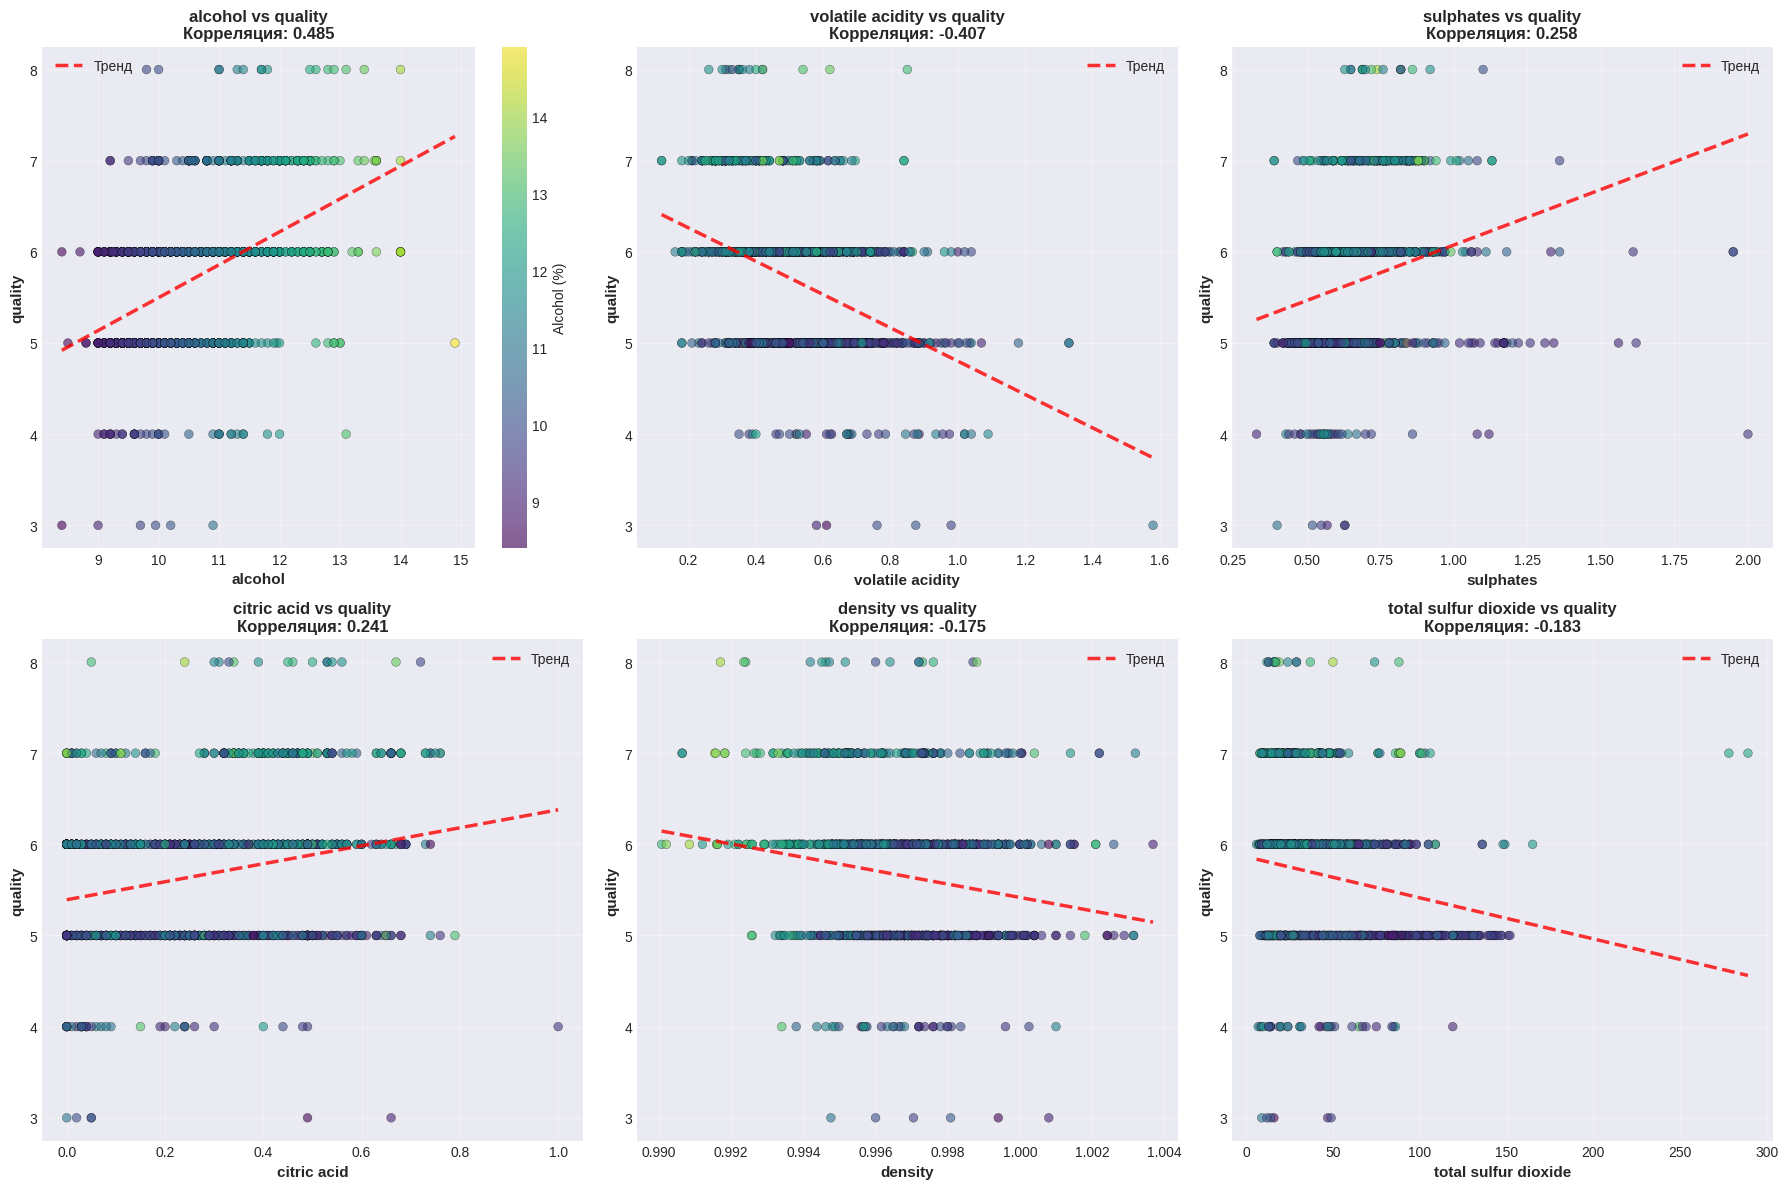

Детальный анализ завершен!


In [ ]:
key_pairs = [
    ('alcohol', 'quality'),
    ('volatile acidity', 'quality'),
    ('sulphates', 'quality'),
    ('citric acid', 'quality'),
    ('density', 'quality'),
    ('total sulfur dioxide', 'quality'),
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (x_col, y_col) in enumerate(key_pairs):
    scatter = axes[idx].scatter(df[x_col], df[y_col],
                               c=df['alcohol'],
                               cmap='viridis',
                               alpha=0.6,
                               s=40,
                               edgecolors='black',
                               linewidth=0.3)

    z = np.polyfit(df[x_col], df[y_col], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[x_col].min(), df[x_col].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2.5, label='Тренд')

    corr = df[x_col].corr(df[y_col])

    axes[idx].set_xlabel(x_col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(y_col, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{x_col} vs {y_col}\nКорреляция: {corr:.3f}',
                       fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3)

    if idx == 0:
        cbar = plt.colorbar(scatter, ax=axes[idx])
        cbar.set_label('Alcohol (%)', fontsize=10)

plt.tight_layout()
plt.show()

print("Детальный анализ завершен!")


In [ ]:
quality_dist = df['quality'].value_counts().sort_index()
print("\nРаспределение оценок качества вина:")
print(quality_dist)

df['quality_category'] = pd.cut(df['quality'],
                                bins=[0, 4, 6, 10],
                                labels=['Low (3-4)', 'Medium (5-6)', 'High (7-8)'])

print("\n\nВина по категориям качества:")
print(df['quality_category'].value_counts())

print("\n\nСредние значения параметров по категориям качества:")
category_stats = df.groupby('quality_category')[['alcohol', 'volatile acidity',
                                                   'sulphates', 'citric acid',
                                                   'density', 'total sulfur dioxide']].mean()
print(category_stats.round(3))

print("\nАнализ завершен!")



Распределение оценок качества вина:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


Вина по категориям качества:
quality_category
Medium (5-6)    945
High (7-8)      159
Low (3-4)        39
Name: count, dtype: int64


Средние значения параметров по категориям качества:
                  alcohol  volatile acidity  sulphates  citric acid  density  \
quality_category                                                               
Low (3-4)          10.173             0.730      0.624        0.173    0.997   
Medium (5-6)       10.270             0.546      0.644        0.252    0.997   
High (7-8)         11.528             0.395      0.746        0.391    0.996   

                  total sulfur dioxide  
quality_category                        
Low (3-4)                       38.128  
Medium (5-6)                    47.791  
High (7-8)                      36.673  

Анализ завершен!


## Итоговые выводы по исследованию датасета Wine QT

**Статистический анализ:**  
Датасет не содержит пропущенных значений, а среди числовых признаков наблюдается наличие выбросов, особенно по остаточному сахару (residual sugar) и хлоридам (chlorides). Остальные выбросы умеренные, критичной чистки датаcета не требуется.

**Корреляционный анализ:**  
Сильной положительной корреляции между признаками не выявлено, однако alcohol (0.49) и sulphates (0.26) влияют на качество положительно, а volatile acidity (-0.41) и density (-0.18) — отрицательно.  
Лучшее качество вина (7+ баллов) тесно связано с повышенным содержанием алкоголя и снижением летучей кислотности.

**Визуализация:**  
Scatter plot и pairplot показали видимую тенденцию — чем выше alcohol и ниже volatile acidity, тем выше оценка качества. Линейные тренды подтверждают эти выводы.
